In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 120

df = pd.DataFrame({
    "age": np.random.randint(18, 65, size=n),
    "gender": np.random.choice(["Male", "Female"], size=n),
    "monthly_income": np.random.normal(8000, 2500, size=n),
    "city": np.random.choice(["İstanbul", "Ankara", "İzmir"], size=n),
    "purchase_score": np.random.randint(1, 100, size=n),
})

# eksik değerler ekle
df.loc[np.random.choice(n, 10, replace=False), "monthly_income"] = np.nan
df.loc[np.random.choice(n, 8, replace=False), "city"] = np.nan

# anlamlı target: harcama miktarı
df["spending"] = df["monthly_income"] * 0.8 + df["age"] * 30 + np.random.normal(0, 700, size=n)

# aykırı değer
df.loc[3, "spending"] = 60000
df.loc[10, "monthly_income"] = 50000

df.head(10)

,age,gender,monthly_income,city,purchase_score,spending
0,56,Female,7839.054873,İstanbul,34,9102.721298
1,46,Female,8862.255838,İstanbul,7,8295.479442
2,32,Male,7799.781662,İstanbul,68,7603.415203
3,60,Male,NaN,İstanbul,58,60000.000000
4,25,Female,11583.788718,İzmir,75,12172.247540
5,38,Female,10664.484271,Ankara,29,10455.289855
6,56,Female,NaN,NaN,36,NaN
7,36,Male,11700.821403,Ankara,89,9771.778814
8,40,Male,13396.821308,İzmir,21,10792.944623
9,28,Male,11079.445942,İzmir,36,9845.981299


In [3]:
#Hangi sütunlarda eksik veri var?
print(df.isnull().sum())


age                0
gender             0
monthly_income    10
city               8
purchase_score     0
spending           9
dtype: int64


In [4]:
#Her bir sütun için eksik oranı nedir?
eksik_oran=df.isnull().sum()/len(df)
print(eksik_oran)

age               0.000000
gender            0.000000
monthly_income    0.083333
city              0.066667
purchase_score    0.000000
spending          0.075000
dtype: float64


In [5]:
#Sayısal değişkenleri SımpleImputer ile doldur
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy="mean")
df[["monthly_income" ,"spending"]]=imp_mean.fit_transform(df[["monthly_income" ,  "spending"]])
df.head(10)


,age,gender,monthly_income,city,purchase_score,spending
0,56,Female,7839.054873,İstanbul,34,9102.721298
1,46,Female,8862.255838,İstanbul,7,8295.479442
2,32,Male,7799.781662,İstanbul,68,7603.415203
3,60,Male,8373.833079,İstanbul,58,60000.000000
4,25,Female,11583.788718,İzmir,75,12172.247540
5,38,Female,10664.484271,Ankara,29,10455.289855
6,56,Female,8373.833079,NaN,36,8024.503392
7,36,Male,11700.821403,Ankara,89,9771.778814
8,40,Male,13396.821308,İzmir,21,10792.944623
9,28,Male,11079.445942,İzmir,36,9845.981299


In [6]:
#Kategorik değişkenleri en sık kategori ile doldur
imp_mode=SimpleImputer(strategy="most_frequent")
df[["city"]]=imp_mode.fit_transform(df[["city"]])

df.head(10)

,age,gender,monthly_income,city,purchase_score,spending
0,56,Female,7839.054873,İstanbul,34,9102.721298
1,46,Female,8862.255838,İstanbul,7,8295.479442
2,32,Male,7799.781662,İstanbul,68,7603.415203
3,60,Male,8373.833079,İstanbul,58,60000.000000
4,25,Female,11583.788718,İzmir,75,12172.247540
5,38,Female,10664.484271,Ankara,29,10455.289855
6,56,Female,8373.833079,İstanbul,36,8024.503392
7,36,Male,11700.821403,Ankara,89,9771.778814
8,40,Male,13396.821308,İzmir,21,10792.944623
9,28,Male,11079.445942,İzmir,36,9845.981299


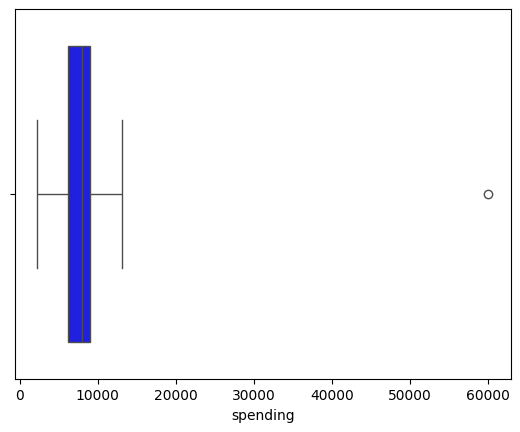

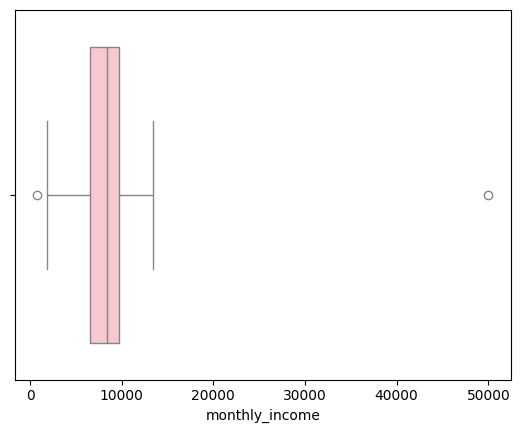

In [7]:
#spending ve monthly_income değişkenleri için boxplot çiz
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df["spending"] , color='blue' ,)
plt.xlabel("spending")
plt.show()
sns.boxplot(x=df["monthly_income"] , color='pink')
plt.xlabel("monthly_income")
plt.show()



In [8]:
#IQR yöntemiyle aykırı değerleri tespit et
Q1=df["spending"].quantile(0.25)
Q3=df["spending"].quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
aykiri_degerler=df[(df["spending"]<alt_sinir) | (df["spending"]>ust_sinir)]
print(aykiri_degerler)

print("*************")

Q1=df["monthly_income"].quantile(0.25)
Q3=df["monthly_income"].quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
aykiri_degerler=df[(df["monthly_income"]<alt_sinir) | (df["monthly_income"]>ust_sinir)]
print(aykiri_degerler)

   age gender  monthly_income      city  purchase_score  spending
3   60   Male     8373.833079  İstanbul              58   60000.0
*************
    age  gender  monthly_income    city  purchase_score     spending
10   28    Male    50000.000000   İzmir              10  6281.905512
56   52  Female      801.357766  Ankara              25  2648.100934


In [9]:
#winsorizing veya clip yöntemiyle aykırıları baskıla
df["spending_winsorized"]=df["spending"].clip(lower= alt_sinir, upper=ust_sinir)
df["monthly_income_winsorized"]=df["monthly_income"].clip(lower= alt_sinir, upper=ust_sinir)
print(df)

     age  gender  monthly_income      city  purchase_score      spending  \
0     56  Female     7839.054873  İstanbul              34   9102.721298   
1     46  Female     8862.255838  İstanbul               7   8295.479442   
2     32    Male     7799.781662  İstanbul              68   7603.415203   
3     60    Male     8373.833079  İstanbul              58  60000.000000   
4     25  Female    11583.788718     İzmir              75  12172.247540   
..   ...     ...             ...       ...             ...           ...   
115   25  Female    11003.451111  İstanbul              67   8953.502210   
116   29    Male     8374.584291    Ankara              45   7619.763799   
117   51    Male     8352.268420    Ankara              13   7877.454523   
118   50    Male     8886.048963    Ankara              92   8944.125048   
119   40    Male     3299.218529    Ankara              58   4072.938297   

     spending_winsorized  monthly_income_winsorized  
0            9102.721298         

In [10]:
#gender:labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender_label"]=le.fit_transform(df["gender"])
print(df[["gender_label" ,"gender"]])


     gender_label  gender
0               0  Female
1               0  Female
2               1    Male
3               1    Male
4               0  Female
..            ...     ...
115             0  Female
116             1    Male
117             1    Male
118             1    Male
119             1    Male

[120 rows x 2 columns]


In [11]:
#city:one-hot encoding
df = pd.get_dummies(df, columns=['city'], drop_first=True)
print(df)

     age  gender  monthly_income  purchase_score      spending  \
0     56  Female     7839.054873              34   9102.721298   
1     46  Female     8862.255838               7   8295.479442   
2     32    Male     7799.781662              68   7603.415203   
3     60    Male     8373.833079              58  60000.000000   
4     25  Female    11583.788718              75  12172.247540   
..   ...     ...             ...             ...           ...   
115   25  Female    11003.451111              67   8953.502210   
116   29    Male     8374.584291              45   7619.763799   
117   51    Male     8352.268420              13   7877.454523   
118   50    Male     8886.048963              92   8944.125048   
119   40    Male     3299.218529              58   4072.938297   

     spending_winsorized  monthly_income_winsorized  gender_label  \
0            9102.721298                7839.054873             0   
1            8295.479442                8862.255838             0   


In [12]:
#sayısal verileri ölçekle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sayısal_sütun = ["age", "monthly_income", "purchase_score"]
df[sayısal_sütun] = scaler.fit_transform(df[sayısal_sütun])

In [13]:
#spending değişkenine log uygula
df["spending_log"]=np.log1p(df["spending"])
print(df)

          age  gender  monthly_income  purchase_score      spending  \
0    1.114092  Female       -0.117408       -0.521209   9102.721298   
1    0.387510  Female        0.107231       -1.459907   8295.479442   
2   -0.629704    Male       -0.126031        0.660855   7603.415203   
3    1.404725    Male        0.000000        0.313189  60000.000000   
4   -1.138312  Female        0.704732        0.904221  12172.247540   
..        ...     ...             ...             ...           ...   
115 -1.138312  Female        0.577322        0.626088   8953.502210   
116 -0.847679    Male        0.000165       -0.138777   7619.763799   
117  0.750801    Male       -0.004734       -1.251307   7877.454523   
118  0.678143    Male        0.112455        1.495253   8944.125048   
119 -0.048439    Male       -1.114110        0.313189   4072.938297   

     spending_winsorized  monthly_income_winsorized  gender_label  \
0            9102.721298                7839.054873             0   
1        

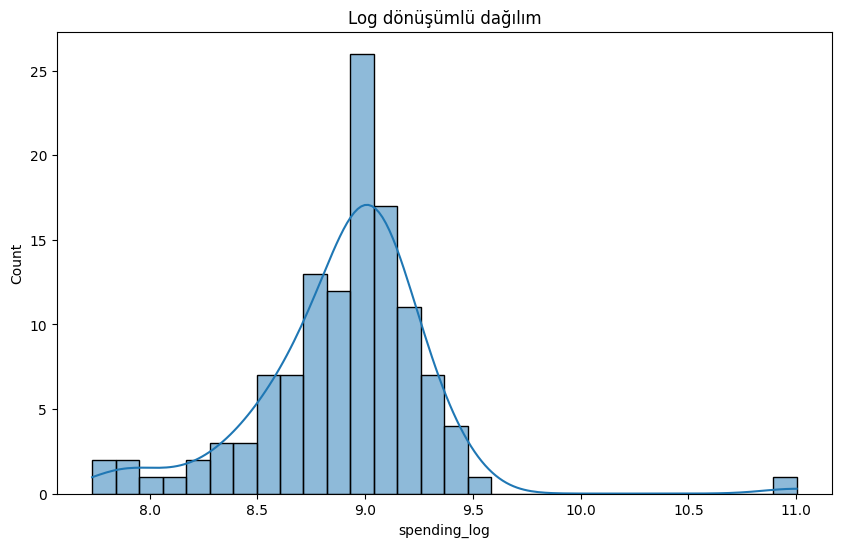

In [14]:
#dağılım görseli
plt.figure(figsize=(10, 6))
sns.histplot(df["spending_log"], bins=30, kde=True)
plt.title("Log dönüşümlü dağılım")
plt.show()

In [15]:
#model kur
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,   r2_score
x=df[["age"]] #bagımsız degisken
y=df["spending_log"]

model=LinearRegression()
model.fit(x , y)
y_pred=model.predict(x)
mse=mean_squared_error(y , y_pred)
r2=r2_score(y , y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14484232204421935
R-squared: 0.07666746619807097


#modeli degerlendir
r2 değeri 0.076 çıktı. 1e ne kadar yakınsa o kadar iyi. Yaşın harcama üzerindeki etkisi düşük. yaş tek başına yetersiz bir değişkendir.

In [17]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = df[["age"]]  # bağımsız değişken
y = df["spending_log"]  # bağımlı değişken

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)
y_pred_rf = rf.predict(x)

r2_rf = r2_score(y, y_pred_rf)
mse_rf = mean_squared_error(y, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.0825866901787217
R-squared: 0.47353110040755997
